# Matplotlib tutorial (Basic) 

`Matplotlib` is a powerful and comprehensive library for creating static, animated, and interactive visualizations in Python. 

This tutorial covers some basic usage patterns and practices to help you get started with Matplotlib：
* A simple example
* Plots in statistics: histograms, density plots, pie charts, bar charts, box plots, and scatter plots
* Time series data visualization: line plots, histograms and density plots, box plots, lag plots, and autocorrelation plots
* 2D plotting methods: images, contour plots, quiver plots, and stream plots

## Installation

You can install `Matplotlib` either using `pip` or `conda`. Open the console and run `pip install matplotlib` for `pip`, or `conda install matplotlib` for `conda`.

To verify that `Matplotlib` is successfully installed on your system, import `Matplotlib` and print its version.

In [2]:
import matplotlib

print(matplotlib.__version__)

3.3.4


## A simple example

In this section, two basic methods of plotting will be illustrated by a simple example of line plots. 

`matplotlib.pyplot` is a collection of functions that make changes to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [4]:
import matplotlib.pyplot as plt
import numpy as np   # import numpy to create some data for plotting

The simplest way to create a figure with axes is using `pyplot.subplots`. We can then use `Axes.plot` to draw some data on the axes:

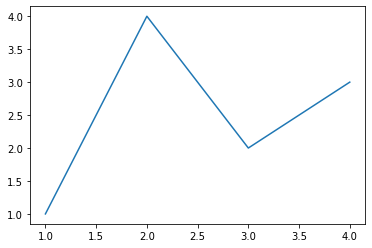

In [5]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

An alternative way to achieve the above result without explicitly creating an axes is to use `plt.plot`, which performs the plot on the "current" axes, creating that axes (and its parent figure) if they don't exist yet. So, the previous example can be written shortly as:

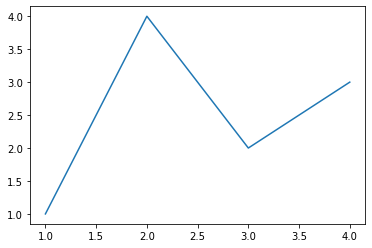

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot

We now plot the linear, quadratic, and cubic lines in another figure. Then, we add x-label, y-label, title, and legend to it.

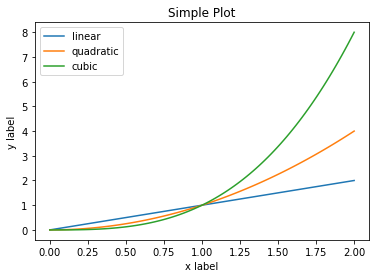

In [7]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.

ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

The data limits can be controlled via `Axes.set_xlim()` and `Axes.set_ylim()`.

(0.0, 6.0)

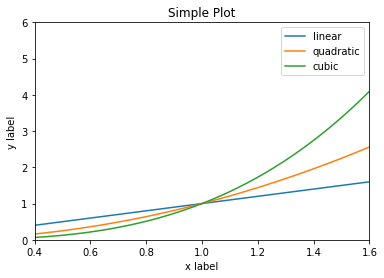

In [13]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.set_xlim(0.4, 1.6)  # Control the limits of x-axis
ax.set_ylim(0, 6)  # Control the limits of y-axis

Alternatively, there are corresponding functions in the `matplotlib.pyplot` module that achieve the same results: 

(0.0, 6.0)

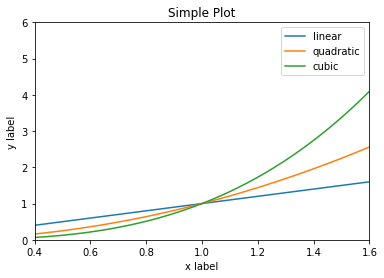

In [14]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.xlim(0.4, 1.6)
plt.ylim(0, 6)

However, if you have multiple sub-plots, it'd be better to utilize the first method of `pyplot.subplots`. You may use `figsize` to specify the size of the figure. 

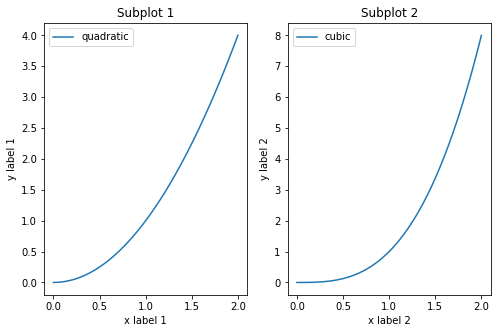

In [19]:
x = np.linspace(0, 2, 100)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8, 5))  # Specify the size of the figure
ax1.plot(x, x**2, label='quadratic')
ax1.set_xlabel('x label 1')  # Add an x-label to the axes.
ax1.set_ylabel('y label 1')  # Add a y-label to the axes.
ax1.set_title("Subplot 1")  # Add a title to the axes.
ax1.legend()  # Add a legend.

ax2.plot(x, x**3, label='cubic')
ax2.set_xlabel('x label 2')  # Add an x-label to the axes.
ax2.set_ylabel('y label 2')  # Add a y-label to the axes.
ax2.set_title("Subplot 2")  # Add a title to the axes.
ax2.legend()  # Add a legend.

## Plots in statistics 

In this section, some commonly used plots in statistics will be introduced, including histograms, density plots, pie charts, bar charts, box plots, and scatter plots.

### Histograms

A histogram represents the distribution of a continuous variable. The `hist()` function automatically generates histograms and returns the bin counts or probabilities. 

Let's randomly generate some data with mean $\mu$ and standard deviation $\sigma$ to see the distribution. 

Text(0.5, 1.0, 'Histogram: $\\mu=100$, $\\sigma=15$')

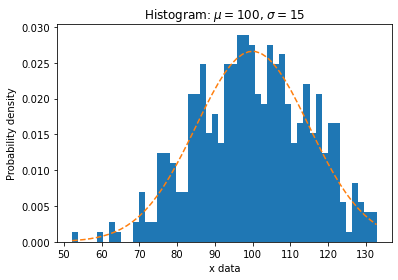

In [140]:
np.random.seed(20)   # Fixing random state for reproducibility

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(450)  # Return 450 samples from the standard normal distribution

num_bins = 50  # number of bins for the histogram

# plot the histogram of the data
fig, ax = plt.subplots()
n, bins, _ = ax.hist(x, num_bins, density=True) 
# n: array, the values of the histogram bins.
# bins: array, the edges of the bins.
# density: If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))  # the analytical formula of the normal distribution
ax.plot(bins, y, '--')
ax.set_xlabel('x data')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram: $\mu=100$, $\sigma=15$')

### Density plots

Density plots give us an idea of the shape of the distribution of observations. This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

There are many ways to generate the density plot. Here we plot it directly by estimating the density function from the given data using the `gaussian_kde()` method from the `scipy.stats` module. Another way is to set `kind='density'` in `pandas.DataFrame.plot()` method, which will be discussed later in the section of Time series data visualization.

Text(0.5, 1.0, 'Histogram: $\\mu=100$, $\\sigma=15$')

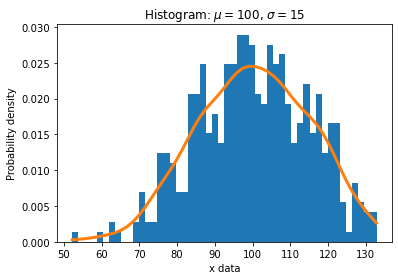

In [147]:
from scipy.stats import kde

# kernel-density estimate using Gaussian kernels
density = kde.gaussian_kde(x)
y = density(bins)

# plot the histogram of the data
fig, ax = plt.subplots()
n, bins, _ = ax.hist(x, num_bins, density=True) 
ax.plot(bins, y, linewidth=3)
ax.set_xlabel('x data')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram: $\mu=100$, $\sigma=15$')

### Pie charts

Pie charts illustrate the proportions of categorical variables. The `pie()` function automatically generates pie charts.

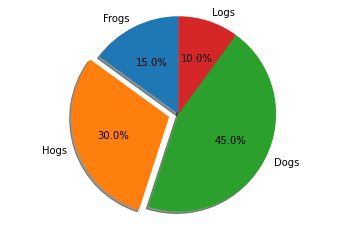

In [31]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Bar charts

Bar charts are useful for visualizing counts, or summary statistics with error bars. Use `bar()` or `barh()` function for bar charts or horizontal bar charts.

<BarContainer object of 3 artists>

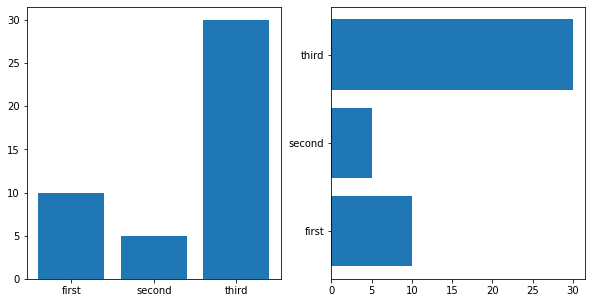

In [32]:
labels = ['first', 'second', 'third']
values = [10, 5, 30]

fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
axes[0].bar(labels, values)
axes[1].barh(labels, values)

You may also plot grouped bar charts with labels by customizing labels and x-axis tick labels.

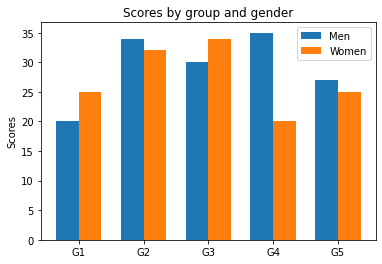

In [37]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adds the value labels to bars. This is only available for Matplotlib 3.4 or above
# ax.bar_label(rects1, padding=3)  
# ax.bar_label(rects2, padding=3)

### Box plots

Box plots provide insight into distribution properties of the data. The `boxplot()` function makes a box and whisker plot for each column of the input. The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. 

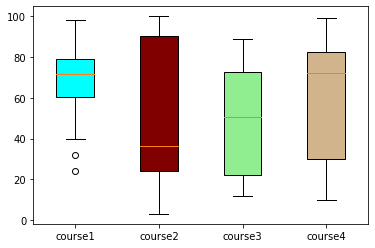

In [43]:
value1 = [82, 76, 24, 40, 67, 62, 75, 78, 71, 32, 98, 89, 78, 67, 72, 82, 87, 66, 56, 52] 
value2 = [62, 5, 91, 25, 36, 32, 96, 95, 3, 90, 95, 32, 27, 55, 100, 15, 71, 11, 37, 21] 
value3 = [23, 89, 12, 78, 72, 89, 25, 69, 68, 86, 19, 49, 15, 16, 16, 75, 65, 31, 25, 52] 
value4 = [59, 73, 70, 16, 81, 61, 88, 98, 10, 87, 29, 72, 16, 23, 72, 88, 78, 99, 75, 30] 
 
box_plot_data = [value1, value2, value3, value4]

# plot
fig, ax = plt.subplots()
box = ax.boxplot(box_plot_data, vert=True, patch_artist=True, labels=['course1', 'course2', 'course3', 'course4'])
# vert=True, draw vertical boxes
# patch_artist=True, produce boxes with Patch artists

colors = ['cyan', 'maroon', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

### Scatter plots

Scatter plots show the extent of correlation between two variables on horizontal and vertical axes. To make a scatter plot, use `scatter()` function. The color, size, and style of the markers could be changed according to your need.

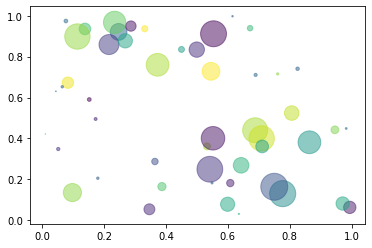

In [44]:
np.random.seed(19)  # Fixing random state for reproducibility

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

fig, ax = plt.subplots()
ax.scatter(x, y, s=area, c=colors, alpha=0.5)
# s, size
# c, color
# alpha, transparency

## Time series data visualization

There are multiple ways to visualize the time series data. Here, we will take the dataset of 'Daily rainfall of Changi station' as an example to demonstrate some simple and useful methods.

First, read the data from csv file and check the contents. Remember to set `parse_dates=True` to convert the index column to datetime. You may also parse specific column(s) by e.g. `parse_dates=[1, 2, 3]`.

In [85]:
import pandas as pd

# read the dataset from csv
fn = '../../assets/data/Changi_daily_rainfall.csv'
# './python-climate-visuals-master/assets/data/Changi_daily_rainfall.csv'
df = pd.read_csv(fn, index_col=0, header=0, parse_dates=True)

# only use the data in 2020
df_2020 = df.loc['2020',:]
# show the head of the dataframe
df_2020.head()

# df_2020['Daily Rainfall Total (mm)']  # You may uncomment this to see what they are
# df_2020.index  

,Daily Rainfall Total (mm)
Date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


### Line plots

The Line plot is one of the most basic visualizations in time series analysis. You may use `plot_date()` function, which is similar to `plot()` where the input is x and y pair.

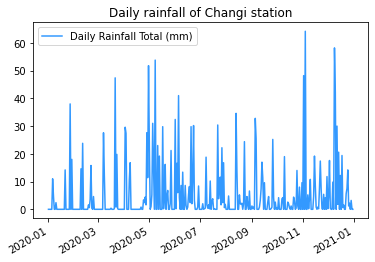

In [86]:
fig, ax = plt.subplots()
ax.plot_date(df_2020.index, df_2020['Daily Rainfall Total (mm)'], linestyle ='solid', fmt='none', color='#3399ff')
ax.set_title('Daily rainfall of Changi station')
ax.legend(df_2020)
fig.autofmt_xdate()  # This automatically rotate the x labels

Alternatively as introduced in Pandas Tutorial (Advanced), this could also be achieved by:

<AxesSubplot:title={'center':'Daily rainfall of Changi station'}, xlabel='Date'>

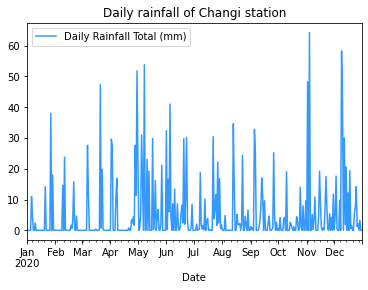

In [87]:
df_2020.plot(title='Daily rainfall of Changi station', color='#3399ff')

You may show comparisons of time series in different years by the method of `dataframe.plot()` mentioned above (and `groupby()` function introduced in Pandas Tutorial (Advanced)). However, the following codes need to assure that the data length of each subplot is the same, i.e., it can only handle 365 days in a year.

In [130]:
df_2017_2019 = df.loc[(df.index >= '2017-01-01')
                     & (df.index < '2020-01-01')]
df_2017_2019['Daily Rainfall Total (mm)'].head()

Date
2017-01-01    0.8
2017-01-02    0.0
2017-01-03    0.6
2017-01-04    2.8
2017-01-05    0.6
Name: Daily Rainfall Total (mm), dtype: float64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

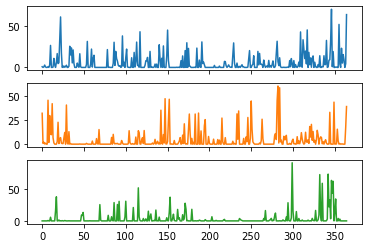

In [131]:
groups = df_2017_2019['Daily Rainfall Total (mm)'].groupby(pd.Grouper(freq='A'))
groups.head()
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)

### Histograms and density plots

Generating histograms and density plots for time series data is similar to previous illustration of plots in statistics.

array([[<AxesSubplot:title={'center':'Daily Rainfall Total (mm)'}>]],
      dtype=object)

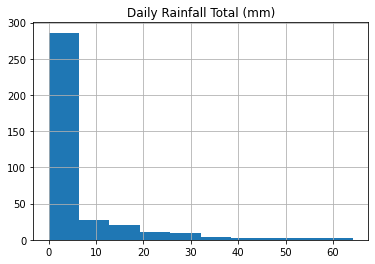

In [132]:
df_2020.hist()  # This function calls matplotlib.pyplot.hist()

Alternatively, `dataframe.plot()` could handle this by setting another argument `kind='hist'`.

<AxesSubplot:ylabel='Frequency'>

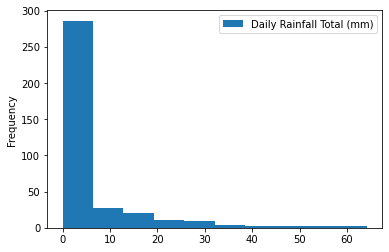

In [134]:
df_2020.plot(kind='hist')

The density plot can be created by simply changing an argument.

<AxesSubplot:ylabel='Density'>

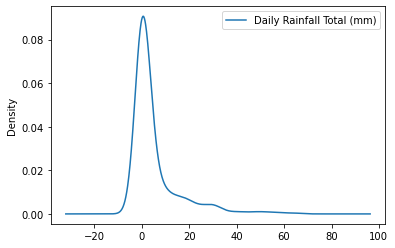

In [152]:
df_2020.plot(kind='kde')
# df_2020.plot(kind='density'), same as kind='kde'

### Box plots

Here, we follow the codes in Pandas Tutorial (Advanced) to calculate the monthly cumulative rainfall and generate a box plot for monthly rainfall in different years. The `resample()` function in `pandas` is utilized. You may refer to Pandas Tutorial (Advanced) for more details.

In [176]:
dfmonth = df.resample('M').sum()
dfmonth = pd.concat([i[1].reset_index(drop=True) for i in dfmonth.loc['1981':'2020',:].groupby(pd.Grouper(freq='Y'))], axis=1)
dfmonth.columns = range(1981, 2021)
dfmonth.index = range(1, 13)
dfmonth.columns.name = 'year'
dfmonth.index.name = 'month'

You can call `matplotlib.pyplot.hist()` to generate box plots.

Text(0.5, 0, 'year')

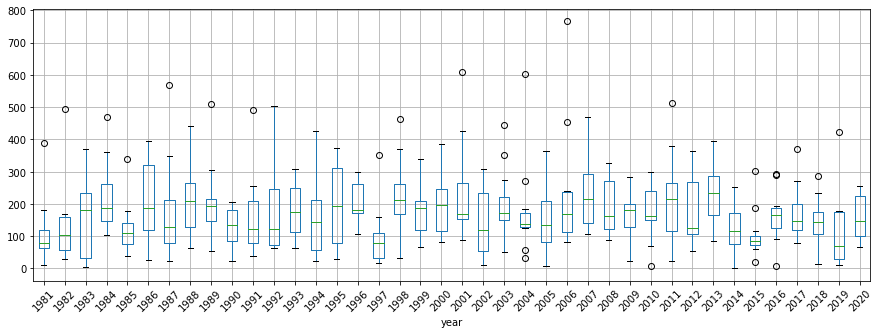

In [177]:
ax = dfmonth.boxplot(figsize=(15,5))
ax.set_xticklabels(dfmonth.columns,rotation=45)
ax.set_xlabel('year')

Alternatively, `dataframe.plot()` could handle this by setting another argument `kind='box'`.

Text(0.5, 0, 'year')

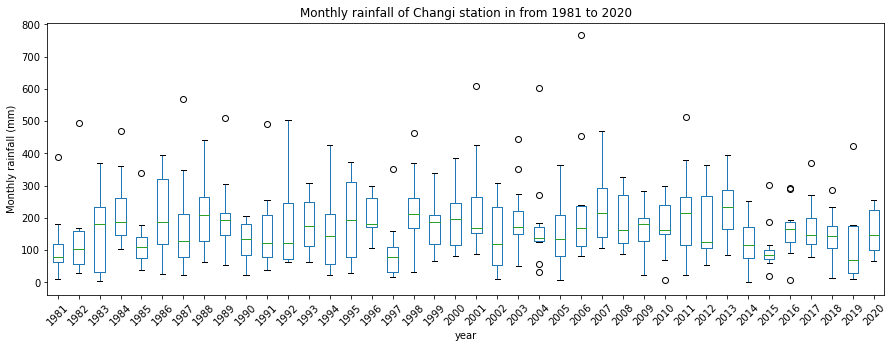

In [178]:
ax = dfmonth.plot(title='Monthly rainfall of Changi station in from 1981 to 2020', xlabel='year', 
             ylabel='Monthly rainfall (mm)', kind='box', figsize=(15,5))
ax.set_xticklabels(dfmonth.columns,rotation=45)
ax.set_xlabel('year')

### Lag plots

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the lag plot, which is a special type of scatter plot. It could be realized by the `lag_plot()` function in `pandas.plotting`.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

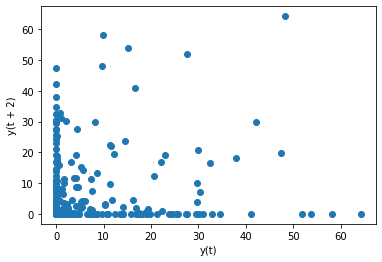

In [186]:
from pandas.plotting import lag_plot

lag_plot(df_2020['Daily Rainfall Total (mm)'], 2)

The above result shows that there is no strong correlation between observations and their lag2 values, as the distribution is relatively random.

### Autocorrelation plots

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. This could be realized by `autocorrelation_plot()` function. 

The horizontal axis of an autocorrelation plot shows the size of the lag between the elements of the time series. For example, the autocorrelation with lag 2 is the correlation between the time series elements and the corresponding elements that were observed two time periods earlier. 

Each spike that rises above or falls below the dashed lines is considered to be statistically significant. This means the spike has a value that is significantly different from zero. If a spike is significantly different from zero, that is evidence of autocorrelation. 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

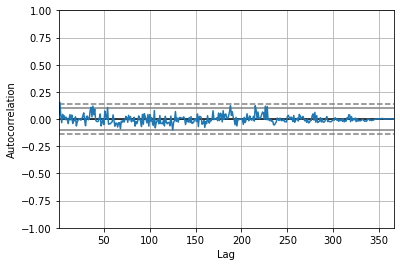

In [187]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_2020['Daily Rainfall Total (mm)'])

In the above example, all values fall within the two dashed lines, showing the evidence against autocorrelation.

## 2D plotting methods

In this section, we will illustrate how to produce 2D plots, including images, contour plots, quiver plots, and stream plots.

### Images

#### Imshow
The most common way to plot images in Matplotlib is with `imshow()`. You may modify multiple arguments to generate the desirable plot.

In [188]:
# generate the data for plotting
x1d = np.linspace(-2*np.pi, 2*np.pi, 100)
y1d = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x1d, y1d)
f = np.cos(xx) * np.sin(yy)
print(f.shape)

(50, 100)


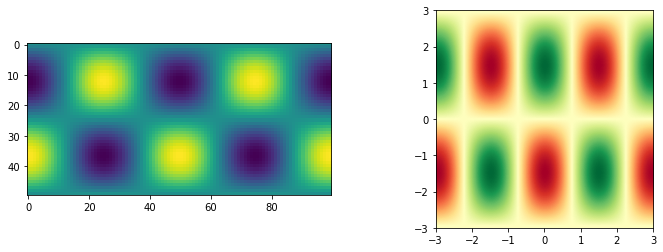

In [198]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
a = ax[0].imshow(f)
ax[1].imshow(f, interpolation='bilinear', cmap=plt.cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(f).max(), vmin=-abs(f).max())

#### Pcolor/pcolormesh

`pcolor` or ` pcolormesh` is another method to create images. 

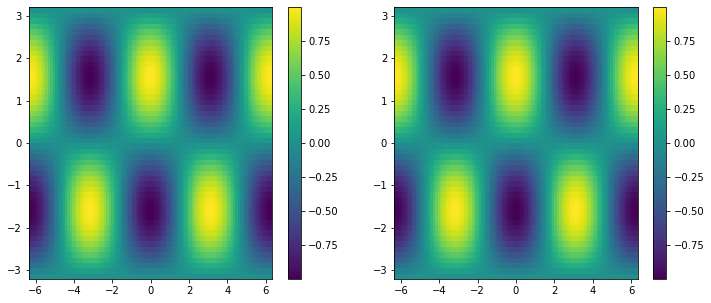

In [196]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

# the following two inputs have the same effects
pc0 = ax[0].pcolormesh(x1d, y1d, f, shading='auto')
pc1 = ax[1].pcolormesh(xx, yy, f, shading='auto')

# generate color bar
fig.colorbar(pc0, ax=ax[0])  
fig.colorbar(pc1, ax=ax[1])

### Contour plots

The following example basically plots the same thing as above. The only difference is that contours are substituted for colored pixels.

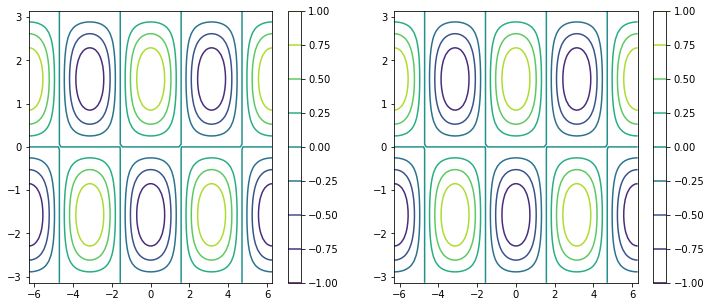

In [201]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

# same thing!
pc0 = ax[0].contour(x1d, y1d, f)
pc1 = ax[1].contour(xx, yy, f)

# generate color bar
fig.colorbar(pc0, ax=ax[0])  
fig.colorbar(pc1, ax=ax[1])

### Quiver plots

Quiver plots are for 2D fields of arrows. It is often used for vectors, such as wind velocity.

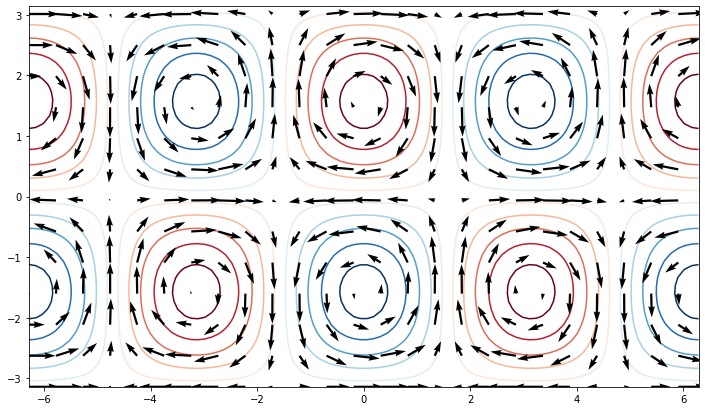

In [204]:
u = -np.cos(xx) * np.cos(yy)
v = -np.sin(xx) * np.sin(yy)

clevels = np.arange(-1, 1, 0.2) + 0.1  #  draw contour lines at the specified levels

fig, ax = plt.subplots(figsize=(12, 7))
ax.contour(xx, yy, f, clevels, cmap='RdBu_r', zorder=0)
ax.quiver(xx[::4, ::4], yy[::4, ::4],
           u[::4, ::4], v[::4, ::4], zorder=1)

### Stream plots

`streamplot()` draws streamlines of a vector flow.

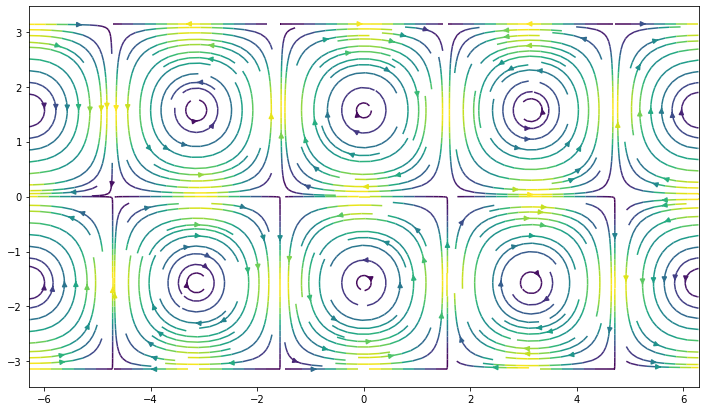

In [205]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.streamplot(xx, yy, u, v, density=2, color=(u**2 + v**2))

After this tutorial, you should have had a basic idea of which functions to choose for a specific type of plot. For more details on the functions, please refer to the documentations listed below in the References.

## References

* [Matplotlib documentation](https://matplotlib.org/stable/contents.html)
* [Pandas documentation](https://pandas.pydata.org/docs/)
* [Plot Time Series in Python](https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/)
* [Research Computing in Earth Sciences-More Matplotlib](https://rabernat.github.io/research_computing_2018/more-matplotlib.html)
* [Time Series Data Visualization with Python](https://machinelearningmastery.com/time-series-data-visualization-with-python/)
